/home/simisimon/GitHub/config-space/env/lib/python3.11/site-packages/numpy/_core/getlimits.py:548: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


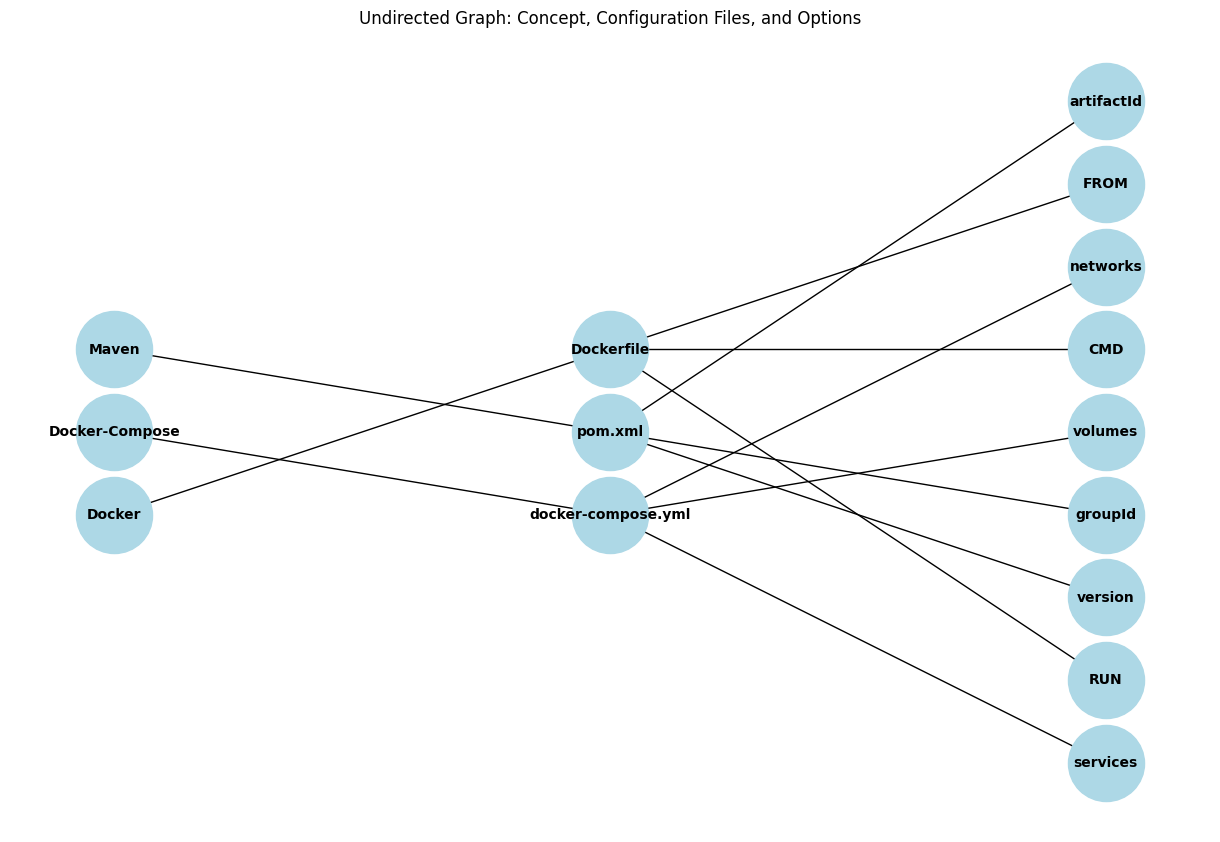

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.Graph()

# Root concepts
concepts = ["Maven", "Docker", "Docker-Compose"]

# Configuration files
config_files = {
    "Maven": ["pom.xml"],
    "Docker": ["Dockerfile"],
    "Docker-Compose": ["docker-compose.yml"]
}

# Options for configuration files
options = {
    "pom.xml": ["groupId", "artifactId", "version"],
    "Dockerfile": ["FROM", "RUN", "CMD"],
    "docker-compose.yml": ["services", "volumes", "networks"]
}

# Add nodes and edges
for concept, files in config_files.items():
    G.add_node(concept, level=1)
    for file in files:
        G.add_node(file, level=2)
        G.add_edge(concept, file)
        for option in options[file]:
            G.add_node(option, level=3)
            G.add_edge(file, option)

# Define positions for the hierarchical layout
pos = nx.multipartite_layout(G, subset_key="level")

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold")
plt.title("Undirected Graph: Concept, Configuration Files, and Options")
plt.show()


In [7]:
import pandas as pd

# Load the uploaded CSV file to inspect its structure
file_path = '../data/test_data/projectB_options.csv'
data = pd.read_csv(file_path)

concepts = data['Concept'].unique()
print(concepts)

# Display the first few rows of the dataset to understand its structure
data.head()




['travis' 'docker' 'configparser' 'maven' 'spring' 'yaml' 'docker-compose']


,File Path,Option,Concept,Values,Changed internally,Removed
0,.travis.yml,after_success,travis,"['bash <(curl -s https://codecov.io/bash)', 'c...",1,False
1,.travis.yml,before_install,travis,"['pip install codecov', 'sudo pip install code...",1,True
2,.travis.yml,dist,travis,['trusty'],0,False
3,.travis.yml,env.global,travis,"['COMMIT=${TRAVIS_COMMIT::7}', 'COMMIT=${TRAVI...",1,False
4,.travis.yml,env.global.secure/GeONVsTD48Y88CKoqupo/FC1Gy0e...,travis,['GeONVsTD48Y88CKoqupo/FC1Gy0eCrT1UNylvMzz5VYc...,0,False


In [ ]:
# Transforming data into nodes and links for D3.js

# Create a list of unique nodes
concepts = data['Concept'].unique()
artifacts = data['File Path'].unique()
options = data[['File Path', 'Option']].apply(tuple, axis=1)

# Define nodes
nodes = [{'id': concept, 'type': 'concept'} for concept in concepts]
nodes += [{'id': artifact, 'type': 'artifact'} for artifact in artifacts]
nodes += [{'id': option, 'type': 'option'} for option in options]

# Define links
links = []

# Link concepts to artifacts
for _, row in data.iterrows():
    links.append({'source': row['Concept'], 'target': row['File Path'], 'type': 'concept-artifact'})
# Link artifacts to options
for _, row in data.iterrows():
    links.append({'source': row['File Path'], 'target': (row['File Path'], row['Option']), 'type': 'artifact-option'})

# Output the data
graph_data = {'nodes': nodes, 'links': links}

# Save the graph data as JSON for D3.js
import json
output_path = '../data/test_data/graph_data.json'
with open(output_path, 'w') as f:
    json.dump(graph_data, f)

output_path

'../data/test_data/graph_data.json'